In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder,OrdinalEncoder, LabelEncoder, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

2025-05-20 10:00:23.820645: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 10:00:23.823529: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 10:00:23.831655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747728023.845867   45878 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747728023.850163   45878 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747728023.860848   45878 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [35]:
df = pd.read_csv('dataset.csv')
df.columns = [c.strip().lower() for c in df.columns]
# 2. Strip whitespace from column names
df.columns = df.columns.str.strip()

# 3. Trim whitespace in all string cells
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 4. Convert empty strings to NaN (optional)
df.replace('', np.nan, inplace=True)
df.totalcharges = pd.to_numeric(df.totalcharges)
# 5. Drop duplicate rows
df.drop_duplicates(inplace=True)

# 6. Drop rows with missing values
df.dropna(inplace=True)


/tmp/ipykernel_45878/4209060789.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [3]:
pd.set_option('display.max_columns', None)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
for elem in df.columns:
    print(f"pour la colonne {elem} le nombre d'élement est de {len(df[elem].unique())}")

pour la colonne customerid le nombre d'élement est de 7032
pour la colonne gender le nombre d'élement est de 2
pour la colonne seniorcitizen le nombre d'élement est de 2
pour la colonne partner le nombre d'élement est de 2
pour la colonne dependents le nombre d'élement est de 2
pour la colonne tenure le nombre d'élement est de 72
pour la colonne phoneservice le nombre d'élement est de 2
pour la colonne multiplelines le nombre d'élement est de 3
pour la colonne internetservice le nombre d'élement est de 3
pour la colonne onlinesecurity le nombre d'élement est de 3
pour la colonne onlinebackup le nombre d'élement est de 3
pour la colonne deviceprotection le nombre d'élement est de 3
pour la colonne techsupport le nombre d'élement est de 3
pour la colonne streamingtv le nombre d'élement est de 3
pour la colonne streamingmovies le nombre d'élement est de 3
pour la colonne contract le nombre d'élement est de 3
pour la colonne paperlessbilling le nombre d'élement est de 2
pour la colonne pay

In [33]:
features_of_interest = [
'gender',
'seniorcitizen',
'partner',
'dependents',
'tenure', 
'phoneservice', 
'multiplelines', 
'internetservice',
'onlinesecurity',
'onlinebackup', 
'deviceprotection', 
'techsupport',
'streamingtv', 
'streamingmovies', 
'contract', 
'paperlessbilling',
'paymentmethod', 
'monthlycharges', 
'totalcharges'
]


numerical_column = [

'tenure', 
'monthlycharges',
'totalcharges'
]


ordinal_column = [
'seniorcitizen',
'gender',
'partner',
'dependents',
'phoneservice',
'paperlessbilling',


]

categorical_column = [

'multiplelines', 
'onlinesecurity',
'onlinebackup', 
'deviceprotection', 
'techsupport',
'streamingtv', 
'streamingmovies', 
'contract', 
'paymentmethod', 


]

target_name = "churn"
# data, target, numerical_data,categorical_data, ordinal_column = (
#     df[features_of_interest],
#     df[target_name],
#     df[numerical_column],
#     df[categorical_column]
# )


### Analyse exploratoire(Anova)

In [37]:


from scipy.stats import f_oneway
# Exemple de dataframe df_2_anova
num_anova = [

'tenure', 
'monthlycharges',
'totalcharges',
'churn'
]
df_2_anova = df[num_anova]



# Boucle sur les colonnes discrètes
for column in num_anova:
    if column != 'churn':
        # Créer les groupes selon la valeur de churn ("Yes" ou "No")
        groups = [
            df_2_anova[df_2_anova['churn'] == label][column].dropna()
            for label in df_2_anova['churn'].unique()
        ]
        # Appliquer le test ANOVA
        stat_anova, p_value = f_oneway(*groups)
        
        # Afficher les résultats de l'ANOVA
        print(f'Le résultat pour {column}')
        print("Statistique F:", stat_anova)
        print("P-value:", p_value)
        print('')
        print('================================================================================')



Le résultat pour tenure
Statistique F: 1007.5094314093412
P-value: 9.437650217603554e-207

Le résultat pour monthlycharges
Statistique F: 271.5769897682043
P-value: 6.760843117999019e-60

Le résultat pour totalcharges
Statistique F: 291.34486236649343
P-value: 4.8768656897080145e-64



#### Analyse du chi2

In [43]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

results = []

cat_column = [
    'multiplelines', 
    'onlinesecurity',
    'onlinebackup', 
    'deviceprotection', 
    'techsupport',
    'streamingtv', 
    'streamingmovies', 
    'contract', 
    'paymentmethod', 
    'churn'  # cible
]

# On isole churn
target = 'churn'
features = [col for col in cat_column if col != target]

# Test du chi2 + Cramér's V
for var in features:
    contingency_table = pd.crosstab(df[var], df[target])

    # Chi2
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Cramér's V
    n = contingency_table.sum().sum()
    k, r = contingency_table.shape
    cramers_v = np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

    # Interprétation
    if cramers_v < 0.1:
        strength = 'Very weak'
    elif cramers_v < 0.3:
        strength = 'Weak'
    elif cramers_v < 0.5:
        strength = 'Moderate'
    else:
        strength = 'Strong'
    
    significance = 'Significant' if p < 0.05 else 'Not significant'
    
    results.append([var, chi2, dof, p, significance, cramers_v, strength])

# Résultats en DataFrame pour affichage clair
results_df = pd.DataFrame(results, columns=['Variable', 'Chi2', 'df', 'p-value', 'Significance', "Cramér's V", 'Association Strength'])
print(results_df.sort_values("Cramér's V", ascending=False))


           Variable         Chi2  df        p-value Significance  Cramér's V  \
7          contract  1179.545829   2  7.326182e-257  Significant    0.409560   
1    onlinesecurity   846.677389   2  1.400687e-184  Significant    0.346992   
4       techsupport   824.925564   2  7.407808e-180  Significant    0.342506   
8     paymentmethod   645.429900   3  1.426310e-139  Significant    0.302960   
2      onlinebackup   599.175185   2  7.776099e-131  Significant    0.291902   
3  deviceprotection   555.880327   2  1.959389e-121  Significant    0.281159   
6   streamingmovies   374.268432   2   5.353560e-82  Significant    0.230702   
5       streamingtv   372.456502   2   1.324641e-81  Significant    0.230143   
0     multiplelines    11.271541   2   3.567927e-03  Significant    0.040036   

  Association Strength  
7             Moderate  
1             Moderate  
4             Moderate  
8             Moderate  
2                 Weak  
3                 Weak  
6                 Weak  

In [7]:
# Séparation train/val/test (80/20 puis 20% de train pour val)
X = df.drop(columns=target_name)
y=df[target_name]
binirazer = LabelBinarizer()
y = binirazer.fit_transform(y)
X.shape, y.shape

((7032, 20), (7032, 1))

In [8]:

#train

X_train_0, X_test, y_train_0, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# On prend 20% de X_train pour validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_0, y_train_0, test_size=0.2, random_state=42, stratify=y_train_0
)
X_train.shape, X_test.shape, X_val.shape, X_test.shape, y_val.shape, y_test.shape

((4500, 20), (1407, 20), (1125, 20), (1407, 20), (1125, 1), (1407, 1))

In [9]:
# Construction du transformateur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_column),
        ('ord', OrdinalEncoder(), ordinal_column),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_column)
    ]
)

# Fit sur le train uniquement
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test= preprocessor.transform(X_test)

# Affichage
print(X_train[:5])
print(X_val[:5])
print(X_test[:5])

[[-0.57446809 -0.30264699 -0.39167932  0.          1.          0.
   0.          1.          1.          1.          0.          0.
   0.          0.          1.          1.          0.          0.
   1.          0.          0.          0.          0.          1.
   1.          0.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          0.
   1.        ]
 [ 0.40425532 -0.94916842 -0.1212425   0.          1.          0.
   0.          1.          0.          1.          0.          0.
   0.          1.          0.          0.          1.          0.
   0.          1.          0.          0.          1.          0.
   0.          1.          0.          0.          1.          0.
   0.          1.          0.          1.          0.          0.
   0.        ]
 [ 0.21276596 -0.22487702  0.23847503  0.          0.          0.
   0.          1.          1.          1.          0.          0.
   1.          0.          0.          0.     

In [10]:
# Vérification des classes
num_classes = len(np.unique(y))
np.unique(y), num_classes

(array([0, 1]), 2)

In [11]:
# Encodage des labels en one-hot
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat  = tf.keras.utils.to_categorical(y_test,  num_classes)
y_train_cat[:5], y_val_cat[:5], y_test_cat[:5]

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]]))

In [12]:
def build_model():
    # Réseau avec 2 couches cachées de 64 neurones chacune
    # et une couche de sortie avec activation softmax pour classification
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Définition de la fonction de perte, de l'optimiseur et des métriques
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    return model

In [13]:
model = build_model()

E0000 00:00:1747728025.825095   45878 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747728025.825640   45878 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,722 (26.26 KB)

 Trainable params: 6,722 (26.26 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=16,
    verbose=1
)

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7709 - loss: 0.4830 - val_accuracy: 0.7858 - val_loss: 0.4324
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8073 - loss: 0.4090 - val_accuracy: 0.7893 - val_loss: 0.4347
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8058 - loss: 0.4161 - val_accuracy: 0.7956 - val_loss: 0.4331
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8065 - loss: 0.4101 - val_accuracy: 0.7893 - val_loss: 0.4335
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8133 - loss: 0.4032 - val_accuracy: 0.7813 - val_loss: 0.4336
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7981 - loss: 0.4153 - val_accuracy: 0.7760 - val_loss: 0.4454
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8169 - loss: 0.3844 - val_accuracy: 0.7858 - val_loss: 0.4330
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8117 - loss: 0.4010 - val_accuracy: 0.

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nAccuracy sur le test set : {test_acc:.4f}")


Accuracy sur le test set : 0.7868


In [16]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report :")
print(classification_report(y_test, y_pred, target_names=['Yes','No']))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report :
              precision    recall  f1-score   support

         Yes       0.85      0.86      0.86      1033
          No       0.60      0.58      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [17]:
print("Matrice de Confusion :")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Matrice de Confusion :
[[891 142]
 [158 216]]


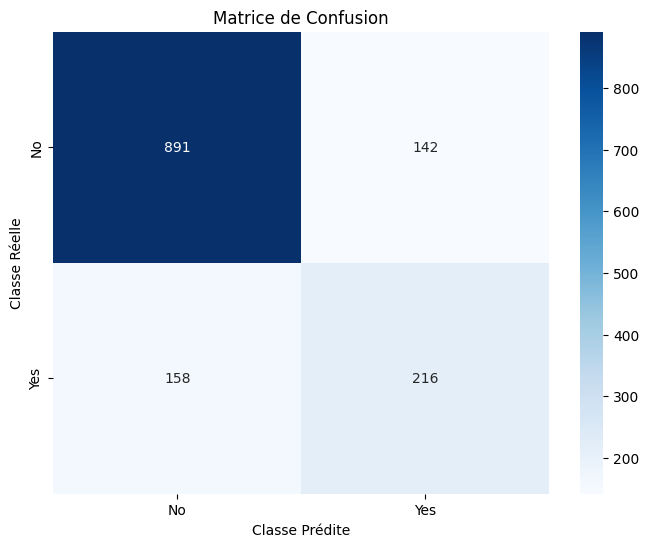

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df.churn.unique(), yticklabels=df.churn.unique())
plt.title("Matrice de Confusion")
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.show()

AttributeError: 'super' object has no attribute '__sklearn_tags__'